<a href="https://colab.research.google.com/github/Mr-S-Mirzoev/Numerical-Stochastic-Calculus/blob/basic_features/Ultimate_NASODE_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Some topological insights

**Measurable space** is just a pair of set and a $σ$-algebra on it: $(X, 𝒜)$

In mathematics, a **topological space** is, roughly speaking, a geometrical space in which closeness is defined but cannot necessarily be measured by a numeric distance. More specifically, a topological space is a set whose elements are called points, along with an additional structure called a topology, which can be defined as a set of neighbourhoods for each point that satisfy some axioms formalizing the concept of closeness. There are several equivalent definitions of a topology, the most commonly used of which is the definition through open sets, which is easier than the others to manipulate.

A **topological space** is the most general type of a mathematical space that allows for the definition of limits, continuity, and connectedness. Common types of topological spaces include Euclidean spaces and metric spaces.

Less formally, **topological space** is a space with kinda definition of closeness thus allowing us to define **limits, continuity etc.**

## Stochastic Processes

### Stochastic process definition

Definition (1.1.1, Stochastic Process)

Let $𝐒 = (S, 𝐒)$ be a measurable space, let $Τ ⊆ R$, and let
$Ω = (Ω, \mathbb{F}, \mathbb{P})$ be a probability space. 

We say that $X$ is a $S$-valued stochastic process with time set $T$ on $Ω$ if and only if:
1. $X : T × Ω → S$, and
2. for every $t ∈ T$ it holds that $(ω \in Ω) → X(t, ω) ∈ S$ is $F/S$-measurable.

$𝐒$ is called the **state space** of the stochastic process $X$. 

Let $t ∈ T$. The function $X_t: Ω → S$, $ω → X(t, ω)$ is called marginal of $X$ (at $t$).

#### Remarks on definition

Interpretations of stochastic processes $X : Τ × Ω -> S$

1.   Two-parametric function $X: Τ × Ω \rightarrow S$ on a cartesian product space
2.   One-parametric family of r.v.s $X_t: Ω \rightarrow S$ of S-valued r.v.s
3.   A family of functions $Τ \rightarrow S, t \rightarrow X_t(ω)$ for $ω \in Ω$

$t \rightarrow X_t$ for fixed $ω \in Ω$ is called a **sample path**

### Stochastic process with continuous sample paths

Definition (1.1.7)

Let $E = (E, E)$ be a topological space and let $Ω = (Ω, F, P)$ be a probability space. We say that $X$ is an $E$-valued stochastic process with continuous sample paths and time set $T ⊆ R$ on $Ω$ if and only if:

1. $X$ is an $(E, B(E))$ - valued stochastic process with time set $T$
on $Ω$ and
2. for every $ω ∈ Ω$ it holds that $(t \in Τ) → X_t(ω) ∈ E$ is a
continuous function.

### Modifications

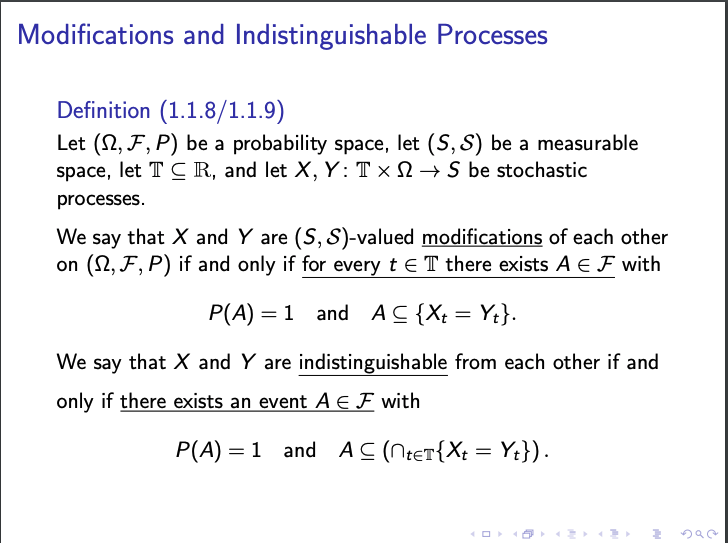

#### Remarks on modifications

Modification - when for every $t \in Τ$ we can find an almost-sure event $A$ which is in event $X_t = Y_t$

Indistinguishable - when there is an almost-sure event $A$ which is in event that $X_t = Y_t$ for all $t \in Τ$

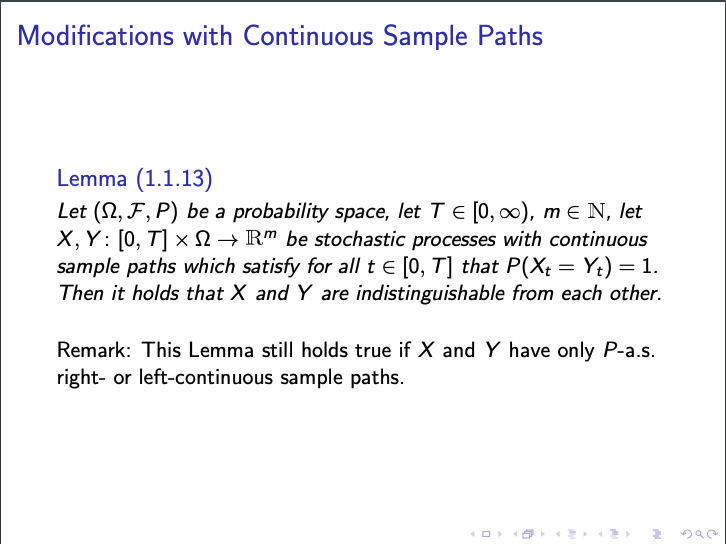

Continuosity is a glue which sticks the diviation from intersection of all $X_t = Y_t$ and for each of them separately.

### Filtration

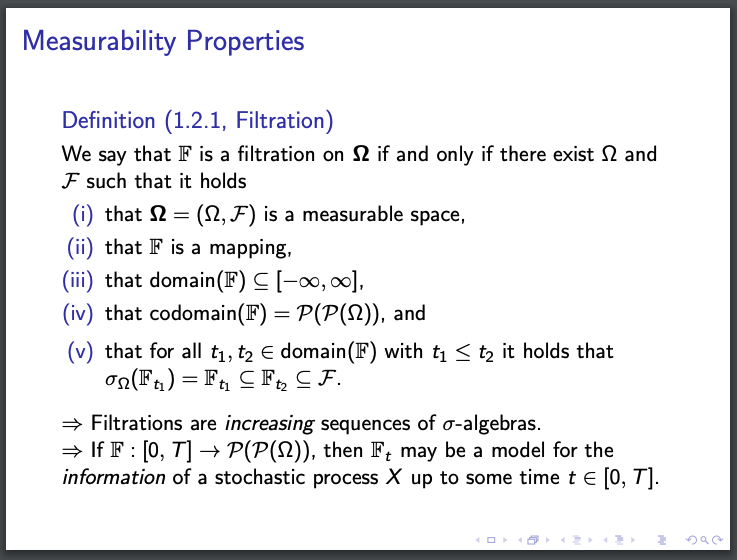

### Normal filtrations

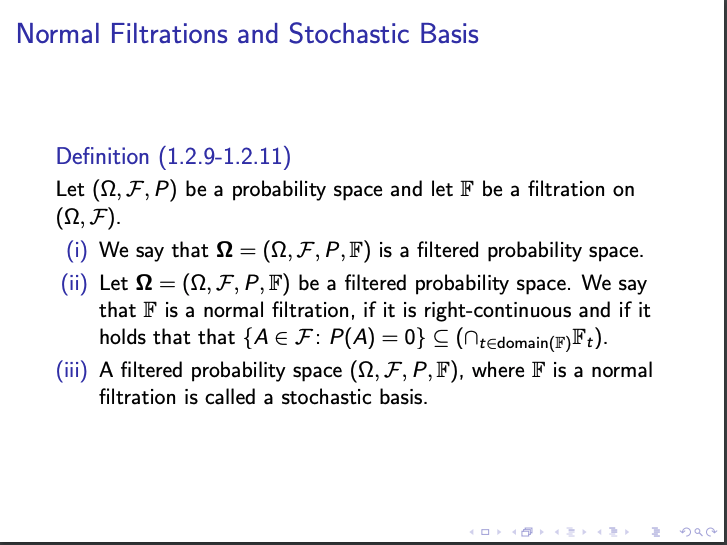

Remarks:

2) There are now "surprises" in the nearest future (no new information immedeately after each $t$) and we know all impossible events in the beginning (intersection of all $\mathbb{F}$ is zero-time filtration).

### Adaptivity

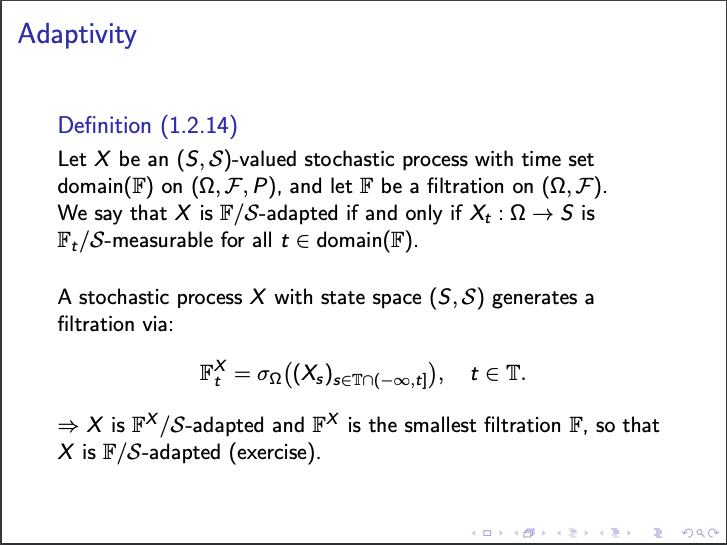

Remarks:

1. $X_t$ is adaptive if for every subset $s$ in $S$ there exists an event $A \in \mathbb{F}_t$ which is: $X_t(A) = s$

### Predictability

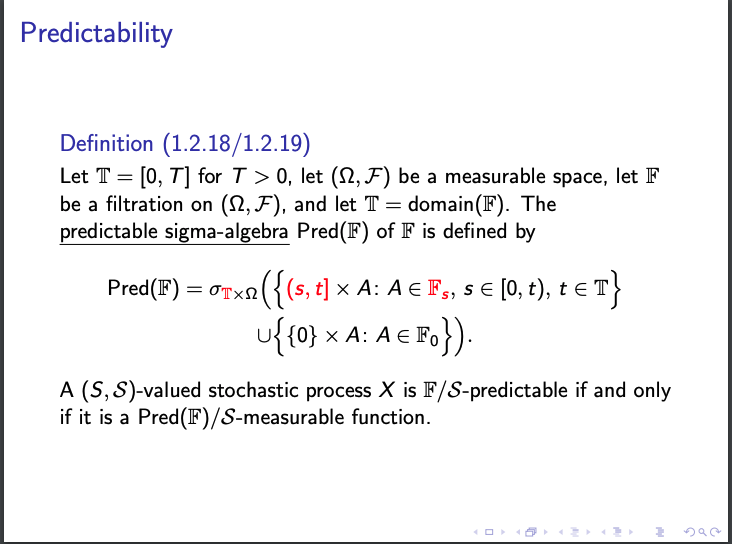

Remarks:

1. Pred($\mathbb{F}$) is a sigma-algebra above all pairs of (t, A), such that A is observable in the information at the earlier time-point that t + all zero-time events

### Predictivity and adaptivity



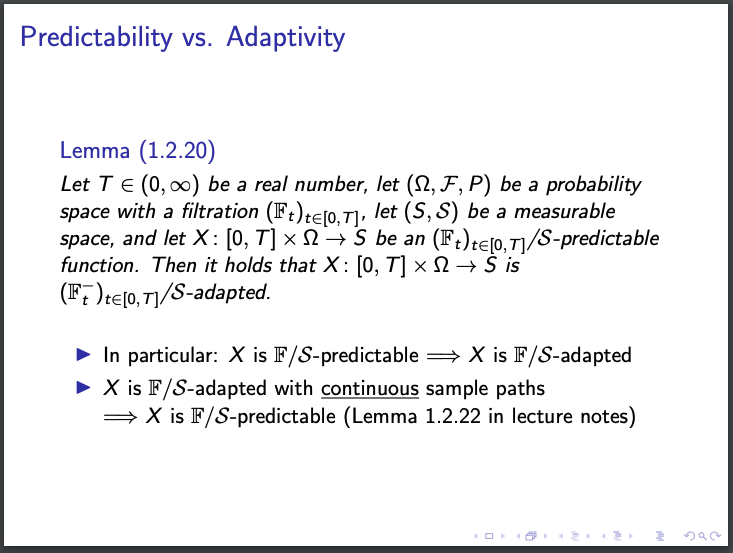

## Standard BM

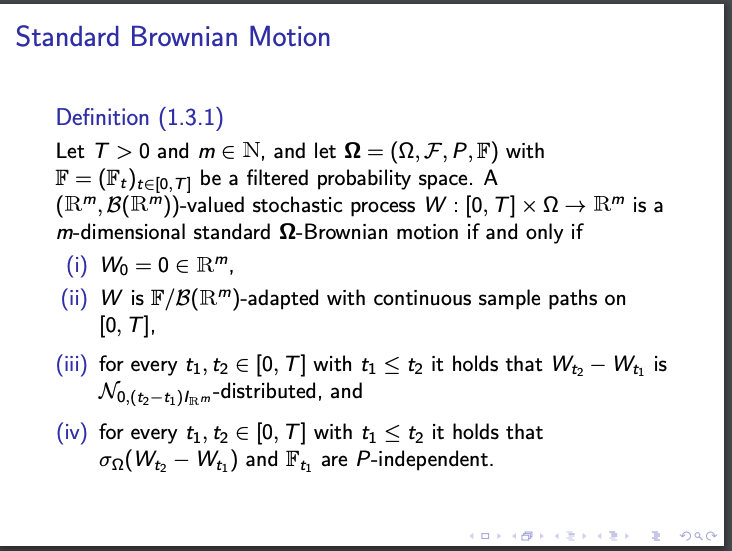

TODO: understand iv

### Basic properties of BM

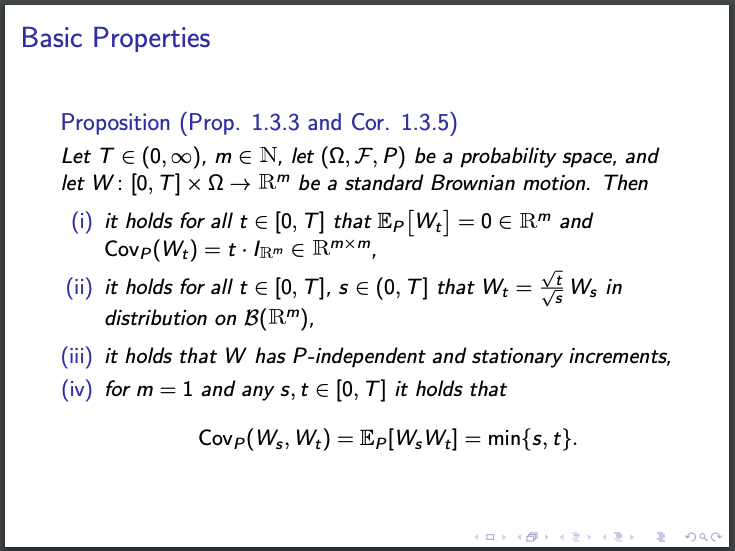

In [47]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [15]:
N = 20;
T = 1;
dt = T / N
np.cumsum([0, np.random.rand(1, N)]) * np.sqrt(dt)

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


array([0.0,
       array([[0.15067962, 0.11011007, 0.00410199, 0.17806265, 0.11763403,
               0.21413395, 0.02261347, 0.17788193, 0.09760213, 0.11071847,
               0.11848398, 0.00218693, 0.19547769, 0.17813636, 0.16385153,
               0.01084589, 0.051453  , 0.18117589, 0.14244735, 0.04619843]])],
      dtype=object)

In [40]:
"""
    Function that returns the linear interpolation WInt of the values
    W_{t_ 0},W_{t_ 1},...,W_{T} with t_i = i*T/N at the vector t
"""
def BMIncInterp(t, T, N):
    dt = T / N
    BM = np.cumsum(np.insert(np.random.standard_normal(N), 0, 0)) * np.sqrt(dt)

    t_i = np.linspace(0, T, N + 1)
    interp_f = interp1d(t_i, BM)
    WInt = interp_f(t)

    return WInt

In [50]:
T=1; t = np.linspace(0, T, 2**10); N = [2**7, 2**8, 2**9];
WInt = [None] * len(N)

for i in range(len(N)):
    WInt[i] = BMIncInterp(t, T, N[i]);

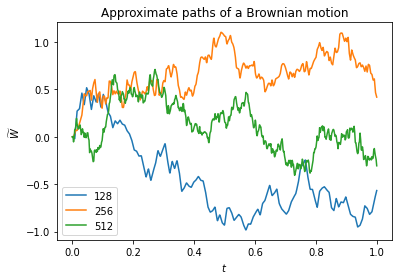

In [73]:
plt.plot(t, WInt[0], t, WInt[1], t, WInt[2], linewidth=1.5)
plt.xlabel('$t$')
plt.ylabel('$\widetilde{W}$')
plt.legend(N)
plt.title('Approximate paths of a Brownian motion')
plt.show()